In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
data = pd.read_csv("data/laptop_data.csv")

In [90]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [91]:
data.shape

(1303, 12)

In [92]:
data.duplicated().sum()

0

In [93]:
data.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [94]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [95]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [96]:
data['Ram'] = data['Ram'].str.replace('GB','')
data['Weight'] = data['Weight'].str.replace('kg','')

In [97]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [98]:
data['Ram'] = data['Ram'].astype('int32')
data['Weight'] = data['Weight'].astype('float32')

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [100]:
data['Touchscreen'] = data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [101]:
data.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
697,Asus,2 in 1 Convertible,12.5,Full HD / Touchscreen 1920x1080,Intel Core M M3-6Y30 0.9GHz,4,64GB Flash Storage,Intel HD Graphics 515,Chrome OS,1.20,35644.32,1
827,Dell,Notebook,14.0,1366x768,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.76,31168.80,0
937,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.20,63882.72,0
383,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.50,58554.72,0
228,Asus,Notebook,17.3,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD + 500GB HDD,Nvidia GeForce GTX 950M,Windows 10,2.69,47472.48,0


In [102]:
data['Ips'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [103]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


In [104]:
new = data['ScreenResolution'].str.split('x',n=1,expand=True)

In [105]:
data['X_res'] = new[0]
data['Y_res'] = new[1]

In [106]:
data.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
455,Dell,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Pentium Quad Core N3710 1.6GHz,4,500GB HDD,Intel HD Graphics 405,Windows 10,1.47,25521.120,1,0,Touchscreen 1366,768
372,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,AMD Ryzen 1700 3GHz,16,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.25,117162.720,0,1,IPS Panel Full HD 1920,1080
811,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.90,128671.200,0,0,Full HD 1920,1080
1093,Dell,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4,256GB SSD,AMD Radeon 530,Windows 10,1.40,43601.688,0,1,IPS Panel Full HD 1920,1080
504,Lenovo,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,16GB SSD,Intel HD Graphics 400,Chrome OS,1.25,14119.200,0,0,1366,768


In [107]:
data['X_res'] = data['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [108]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [109]:
data['X_res'] = data['X_res'].astype('int')
data['Y_res'] = data['Y_res'].astype('int')

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


In [111]:
data['ppi'] = (((data['X_res']**2) + (data['Y_res']**2))**0.5/data['Inches']).astype('float')

In [112]:
data.corr()['Price']

ValueError: could not convert string to float: 'Apple'

In [ ]:
data.drop(columns=['ScreenResolution'],inplace=True)

In [ ]:
data.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [ ]:
data.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [ ]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [ ]:
data['Cpu'].value_counts().index

Index(['Intel Core i5 7200U 2.5GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i5 6200U 2.3GHz',
       'Intel Core i3 6006U 2GHz', 'Intel Core i7 6500U 2.5GHz',
       'Intel Core i7 6700HQ 2.6GHz', 'Intel Core i3 7100U 2.4GHz',
       ...
       'Intel Core i5 7500U 2.7GHz', 'Intel Core i7 2.8GHz',
       'Intel Core i3 6100U 2.1GHz', 'AMD E-Series E2-9000 2.2GHz',
       'Intel Core i7 2.2GHz', 'Intel Core M M3-6Y30 0.9GHz',
       'AMD A9-Series 9420 2.9GHz', 'Intel Core i3 6006U 2.2GHz',
       'AMD A6-Series 7310 2GHz', 'Intel Xeon E3-1535M v6 3.1GHz'],
      dtype='object', name='Cpu', length=118)

In [ ]:
data['Cpu Name'] = data['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [ ]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [ ]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [ ]:
data['Cpu brand'] = data['Cpu Name'].apply(fetch_processor)

In [ ]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<AxesSubplot:>

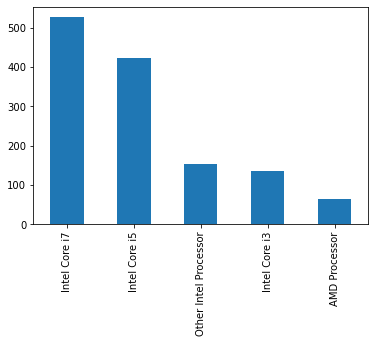

In [ ]:
data['Cpu brand'].value_counts().plot(kind='bar')

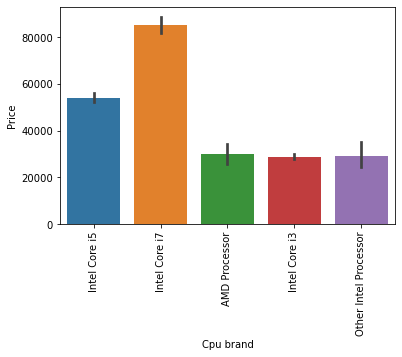

In [ ]:
sns.barplot(x=data['Cpu brand'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
data.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [ ]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<AxesSubplot:>

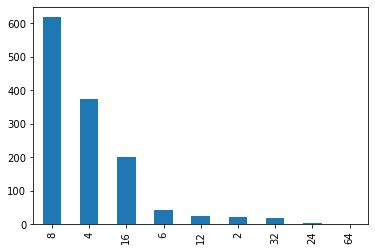

In [ ]:
data['Ram'].value_counts().plot(kind='bar')

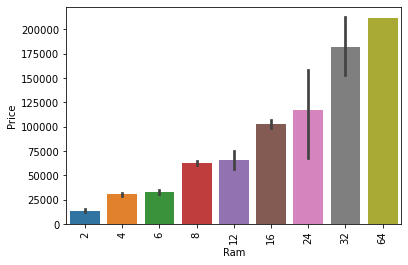

In [ ]:
sns.barplot(x=data['Ram'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
data['Memory'].value_counts().index

Index(['256GB SSD', '1TB HDD', '500GB HDD', '512GB SSD',
       '128GB SSD +  1TB HDD', '128GB SSD', '256GB SSD +  1TB HDD',
       '32GB Flash Storage', '2TB HDD', '64GB Flash Storage',
       '512GB SSD +  1TB HDD', '1TB SSD', '256GB SSD +  2TB HDD',
       '1.0TB Hybrid', '256GB Flash Storage', '16GB Flash Storage', '32GB SSD',
       '180GB SSD', '128GB Flash Storage', '512GB SSD +  2TB HDD', '16GB SSD',
       '512GB Flash Storage', '1TB SSD +  1TB HDD', '256GB SSD +  500GB HDD',
       '128GB SSD +  2TB HDD', '256GB SSD +  256GB SSD',
       '512GB SSD +  256GB SSD', '512GB SSD +  512GB SSD',
       '64GB Flash Storage +  1TB HDD', '1TB HDD +  1TB HDD', '32GB HDD',
       '64GB SSD', '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid',
       '1.0TB HDD', '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype='object', name='Memory')

In [ ]:
data['Memory'] = data['Memory'].astype(str).replace('\.0', '', regex=True)
data["Memory"] = data["Memory"].str.replace('GB', '')
data["Memory"] = data["Memory"].str.replace('TB', '000')
new = data["Memory"].str.split("+", n = 1, expand = True)

data["first"]= new[0]
data["first"]=data["first"].str.strip()

data["second"]= new[1]

data["Layer1HDD"] = data["first"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer1SSD"] = data["first"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer1Hybrid"] = data["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer1Flash_Storage"] = data["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

data['first'] = data['first'].str.replace(r'\D', '')

data["second"].fillna("0", inplace = True)

data["Layer2HDD"] = data["second"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer2SSD"] = data["second"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer2Hybrid"] = data["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer2Flash_Storage"] = data["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

data['second'] = data['second'].str.replace(r'\D', '')

data["first"] = data["first"].astype(int)
data["second"] = data["second"].astype(int)

data["HDD"]=(data["first"]*data["Layer1HDD"]+data["second"]*data["Layer2HDD"])
data["SSD"]=(data["first"]*data["Layer1SSD"]+data["second"]*data["Layer2SSD"])
data["Hybrid"]=(data["first"]*data["Layer1Hybrid"]+data["second"]*data["Layer2Hybrid"])
data["Flash_Storage"]=(data["first"]*data["Layer1Flash_Storage"]+data["second"]*data["Layer2Flash_Storage"])

data.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

<ipython-input-93-10829db803de>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
<ipython-input-93-10829db803de>:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [ ]:
data.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
1247,Asus,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1070,Windows 10,2.34,123876.000,0,1,141.211998,Intel Core i7,1000,256,0,0
505,Lenovo,Notebook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.44,50562.720,0,0,165.632118,Intel Core i5,0,256,0,0
820,Lenovo,Notebook,4,500 HDD,Intel HD Graphics 520,Windows 10,2.10,26101.872,0,0,100.454670,Intel Core i3,500,0,0,0
21,Lenovo,Gaming,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050,Windows 10,2.50,53226.720,0,1,141.211998,Intel Core i5,1000,128,0,0
301,Asus,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1070,Windows 10,2.90,113060.160,0,0,127.335675,Intel Core i7,1000,256,0,0


In [ ]:
data.drop(columns=['Memory'],inplace=True)

In [ ]:
data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [ ]:
data.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [ ]:
data.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [ ]:
data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [ ]:
data['Gpu'].value_counts().index

Index(['Intel HD Graphics 620', 'Intel HD Graphics 520',
       'Intel UHD Graphics 620', 'Nvidia GeForce GTX 1050',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 940MX', 'AMD Radeon 530',
       'Intel HD Graphics 500', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1070',
       ...
       'Intel HD Graphics 530', 'Nvidia GeForce GTX1080',
       'Nvidia GeForce GTX1050 Ti', 'Nvidia Quadro M620M',
       'Intel Graphics 620', 'AMD Radeon R5 520', 'AMD Radeon R7',
       'Intel HD Graphics 540', 'AMD Radeon 540', 'ARM Mali T860 MP4'],
      dtype='object', name='Gpu', length=110)

In [ ]:
data['Gpu brand'] = data['Gpu'].apply(lambda x:x.split()[0])

In [ ]:
data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [ ]:
data['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [ ]:
data = data[data['Gpu brand'] != 'ARM']

In [ ]:
data['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

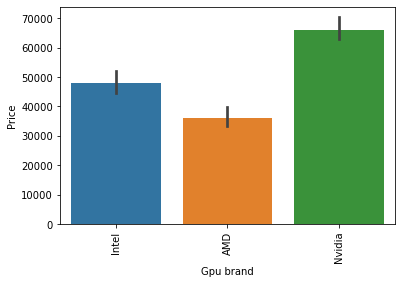

In [ ]:
sns.barplot(x=data['Gpu brand'],y=data['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
data.drop(columns=['Gpu'],inplace=True)

C:\Users\91842\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
data.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [ ]:
data['OpSys'].value_counts().index

Index(['Windows 10', 'No OS', 'Linux', 'Windows 7', 'Chrome OS', 'macOS',
       'Mac OS X', 'Windows 10 S', 'Android'],
      dtype='object', name='OpSys')

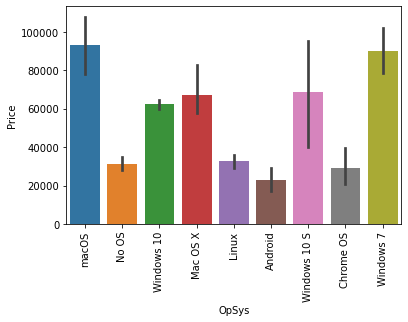

In [ ]:
sns.barplot(x=data['OpSys'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [ ]:
data['os'] = data['OpSys'].apply(cat_os)

<ipython-input-122-38671a3c07bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['os'] = df['OpSys'].apply(cat_os)


In [ ]:
data.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [ ]:
data.drop(columns=['OpSys'],inplace=True)

C:\Users\91842\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


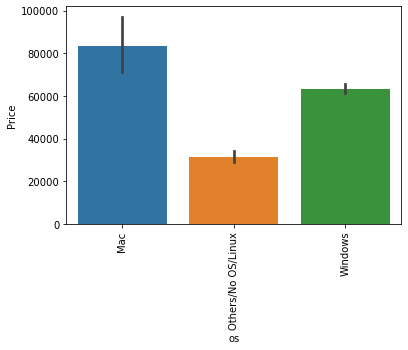

In [ ]:
sns.barplot(x=data['os'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\91842\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

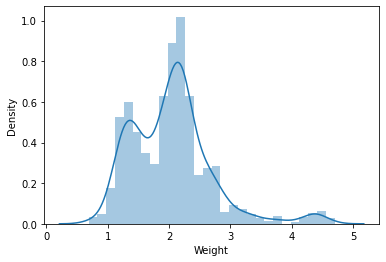

In [ ]:
sns.distplot(data['Weight'])

<AxesSubplot:xlabel='Weight', ylabel='Price'>

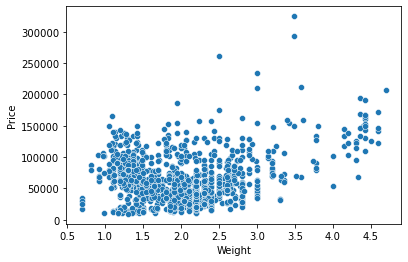

In [ ]:
sns.scatterplot(x=data['Weight'],y=data['Price'])

In [ ]:
data.corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<AxesSubplot:>

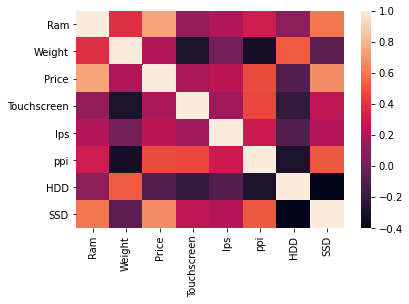

In [ ]:
sns.heatmap(data.corr())

C:\Users\91842\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

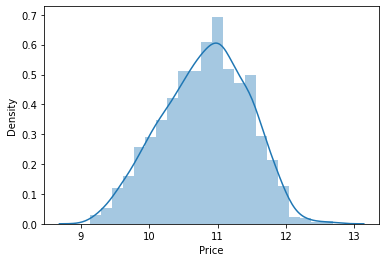

In [ ]:
sns.distplot(np.log(data['Price']))

In [ ]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [ ]:
X = data.drop(columns=['Price'])
y = np.log(data['Price'])

In [ ]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [ ]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [ ]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR

### Linear regression

In [ ]:
import pandas as pd


step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

# Define a list of tuples containing model names and their corresponding instances
models = [
    ('Ridge', Ridge(alpha=10)),
    ('Lasso', Lasso(alpha=0.001)),
    ('KNeighbors', KNeighborsRegressor(n_neighbors=3)),
    ('DecisionTree', DecisionTreeRegressor(max_depth=8)),
    ('SVR', SVR(kernel='rbf', C=10000, epsilon=0.1)),
    ('RandomForest', RandomForestRegressor(n_estimators=100, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15))
]

# Create an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Model', 'R2 Score', 'MAE'])

# Loop through each model, fit the pipeline, and store results in the dataframe
for model_name, model_instance in models:
    step2 = model_instance
    
    # Create the pipeline
    pipe = Pipeline([
        ('step1', step1),
        ('step2', step2)
    ])
    
    # Fit the pipeline
    pipe.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipe.predict(X_test)
    
    # Calculate R2 score and MAE
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Append results to the dataframe
    results_df = results_df.append({'Model': model_name, 'R2 Score': r2, 'MAE': mae}, ignore_index=True)

# Display the results dataframe
print(results_df)


NameError: name 'X_train' is not defined

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8073277448418521
MAE 0.21017827976429174


### Ridge Regression

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8127331031311811
MAE 0.20926802242582954


### Lasso Regression

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8071853945317105
MAE 0.21114361613472565


### KNN

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8021984604448553
MAE 0.19319716721521116


### Decision Tree

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8466456692979233
MAE 0.1806340977609143


### SVM

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8083180902257614
MAE 0.20239059427481307


### Random Forest

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8873402378382488
MAE 0.15860130110457718


### ExtraTrees

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8753793123440623
MAE 0.15979519126758127


### AdaBoost

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7929652659237908
MAE 0.23296532406396742


### Gradient Boost

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8823244736036472
MAE 0.15929506744611283


### XgBoost

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8811773435850243
MAE 0.16496203512600974


### Voting Regressor

In [ ]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8901036732986811
MAE 0.15847265699907628


### Stacking

In [ ]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8816958647512341
MAE 0.1663048975120589


### Exporting the Model

In [ ]:
import pickle

pickle.dump(data,open('data.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [ ]:
data

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [ ]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux
